<a href="https://colab.research.google.com/github/pal1avitanwar/Quiz-Application/blob/main/heart%20attack%20prediction13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/heart (2).csv')

In [4]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
data_dup = data.duplicated().any()
data_dup

True

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()
data_dup

False

In [8]:
cate_val =[]
cont_val = []
for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [9]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [13]:
cate_val
data['cp'].unique()

array([0, 1, 2, 3])

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [21]:
x = data.drop('target',axis=1)
y = data['target']

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
y_test

,target
245,1
349,0
135,0
389,1
66,1
...,...
402,1
123,1
739,0
274,1


In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
Y_predl = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_predl)

0.7868852459016393

In [33]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [34]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [38]:
score = []
for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))
print(score)

[0.7213114754098361, 0.8032786885245902, 0.7049180327868853, 0.7049180327868853, 0.7377049180327869, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7540983606557377, 0.7704918032786885, 0.7540983606557377, 0.7540983606557377, 0.7377049180327869, 0.7540983606557377, 0.7377049180327869, 0.7213114754098361, 0.7377049180327869, 0.7377049180327869, 0.7213114754098361, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869]


In [39]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [40]:
data = pd.read_csv('/content/heart (2).csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [41]:
data = data.drop_duplicates()

In [42]:
data.shape

(302, 14)

In [43]:
X =  data.drop('target',axis=1)
y = data['target']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred4 = dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7049180327868853

In [51]:
 from sklearn.ensemble import RandomForestClassifier
 rf = RandomForestClassifier()
 rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.7540983606557377

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)

GradientBoostingClassifier()

In [57]:
y_pred6 = gd.predict(X_test)
accuracy_score(y_test,y_pred6)

0.7540983606557377

In [67]:
final_data  = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                            'ACC':[ accuracy_score(y_test,Y_predl),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})




In [68]:
print(final_data)

  Models       ACC
0     LR  0.786885
1    SVM  0.803279
2    KNN  0.737705
3     DT  0.704918
4     RF  0.754098
5     GB  0.754098


In [69]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

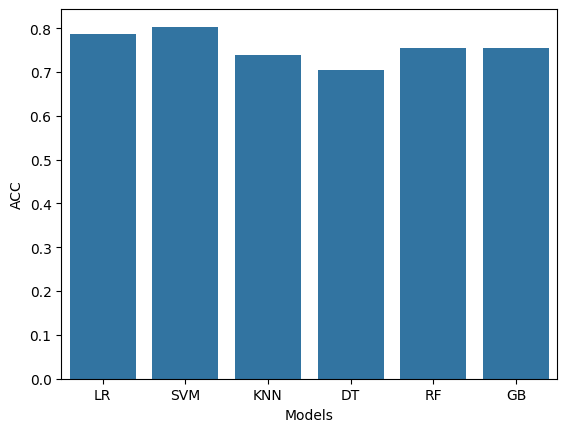

In [71]:
sns.barplot(x='Models',y='ACC',data=final_data)

In [72]:
X =  data.drop('target',axis=1)
y = data['target']

In [73]:
X.shape

(302, 13)

In [74]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [78]:
import pandas as pd
new_data = pd.DataFrame({'age':63,'sex':1,'cp':3,'trestbps':145,'chol':233,'fbs':1,'restecg':1,'thalach':150,'exang':0,'oldpeak':2.3,'slope':0,'ca':0,'thal':2,},index=[0])

print(new_data)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        1      150      0      2.3      0   

   ca  thal  
0   0     2  


In [80]:
# Assuming 'cate_val' and 'cont_val' are defined as in your previous code

# 1. Create a copy of new_data to avoid modifying the original
new_data_encoded = new_data.copy()

# 2. Apply one-hot encoding using the same categories used during training
new_data_encoded = pd.get_dummies(new_data_encoded, columns=cate_val, drop_first=True)

# 3. Align columns: Ensure new_data_encoded has the same columns as the training data
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X_train.columns]

# 4. Now you can make the prediction
svm.predict(new_data_encoded)

array([0])

In [81]:
p =svm.predict(new_data_encoded)
if p[0] == 1:
  print('Affected by Heart Disease')
else:
  print('Not Affected by Heart Disease')

Not Affected by Heart Disease


In [83]:
import joblib

In [84]:
joblib.dump(svm,'Heart_disease_prediction')

['Heart_disease_prediction']

In [85]:
model = joblib.load('Heart_disease_prediction')

In [86]:
model.predict(new_data_encoded)

array([0])

In [87]:
from tkinter import *
import joblib

In [93]:
from tkinter import *
import joblib
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])

    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)


master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

TclError: no display name and no $DISPLAY environment variable